# Pandas

## `DateTime` objects

In [1]:
import pandas as pd

In [2]:
s = pd.Series([2, -3, 51.3, 52])
s

0     2.0
1    -3.0
2    51.3
3    52.0
dtype: float64

In [3]:
import numpy as np
np.exp(s)

0    7.389056e+00
1    4.978707e-02
2    1.902422e+22
3    3.831008e+22
dtype: float64

In [4]:
s_2 = pd.Series([0.4, 9, 324, 13])
s + s_2

0      2.4
1      6.0
2    375.3
3     65.0
dtype: float64

In [5]:
s + 1 # broadcasting

0     3.0
1    -2.0
2    52.3
3    53.0
dtype: float64

In [6]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

In [7]:
s_3 = pd.Series([25, 26, 64, 62], index=["Bob", "Alice", "Chris", "Dan"])
s_3

Bob      25
Alice    26
Chris    64
Dan      62
dtype: int64

In [8]:
s_3["Bob"]

25

In [9]:
s_3[0]

25

In [10]:
s_3.loc["Bob"]

25

In [11]:
s_3.iloc[1]

26

In [12]:
slice_2 = s_2.iloc[1:3]

In [13]:
slice_2 # the index didn't change

1      9.0
2    324.0
dtype: float64

In [14]:
heights = {"Bob":89, "Anne":55, "Chris":70, "Dan":100}
s_4 = pd.Series(heights)
s_4

Bob       89
Anne      55
Chris     70
Dan      100
dtype: int64

In [15]:
s_5 = pd.Series(heights, index=["Dan", "Bob"])
s_5

Dan    100
Bob     89
dtype: int64

In [16]:
print(s_3.keys(),"\n", s_4.keys())

s_3 + s_4

Index(['Bob', 'Alice', 'Chris', 'Dan'], dtype='object') 
 Index(['Bob', 'Anne', 'Chris', 'Dan'], dtype='object')


Alice      NaN
Anne       NaN
Bob      114.0
Chris    134.0
Dan      162.0
dtype: float64

In [17]:
s_6 = pd.Series(42, ["Random", "Values", "Everywhere", "Have", "Seed", "Equal", "To"])
s_6

Random        42
Values        42
Everywhere    42
Have          42
Seed          42
Equal         42
To            42
dtype: int64

In [18]:
s_7 = pd.Series(heights, name="Heights")
s_7

Bob       89
Anne      55
Chris     70
Dan      100
Name: Heights, dtype: int64

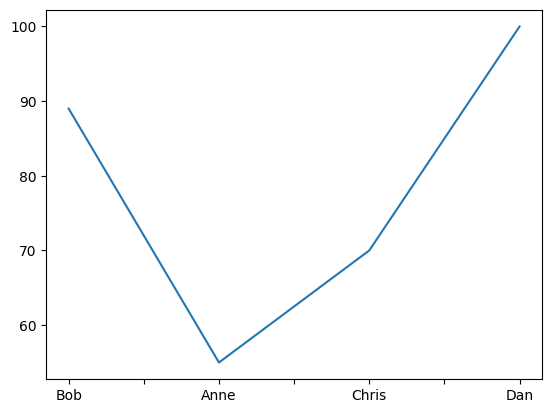

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

s_7.plot()
plt.show()

In [20]:
dates = pd.date_range('1998-07-21 7:20pm', periods=100, freq='9M')
dates[:10]

DatetimeIndex(['1998-07-31 19:20:00', '1999-04-30 19:20:00',
               '2000-01-31 19:20:00', '2000-10-31 19:20:00',
               '2001-07-31 19:20:00', '2002-04-30 19:20:00',
               '2003-01-31 19:20:00', '2003-10-31 19:20:00',
               '2004-07-31 19:20:00', '2005-04-30 19:20:00'],
              dtype='datetime64[ns]', freq='9M')

In [21]:
temperatures = np.array(20 * np.random.rand(100) + 0.45*(np.random.randint(4, size=100))**2 + 5.25*np.random.randint(3, size=100))

<Axes: >

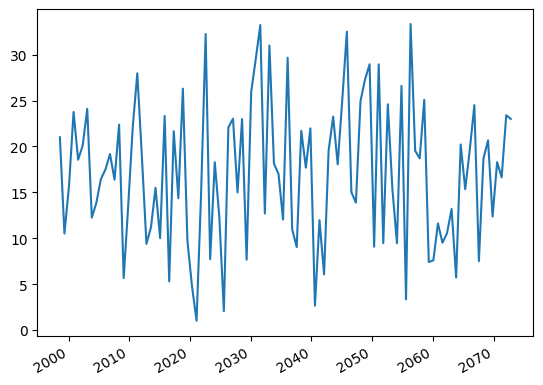

In [22]:
temp_series = pd.Series(temperatures, dates)
temp_series.plot()

If we want to change the sample size, we need to resample.

In [23]:
temp_series_2 = temp_series.resample("5Y").apply(np.min)
temp_series_2

1998-12-31    21.002621
2003-12-31    10.518135
2008-12-31    13.856792
2013-12-31     5.669455
2018-12-31     5.308753
2023-12-31     1.027025
2028-12-31     2.078077
2033-12-31     7.672156
2038-12-31     9.050379
2043-12-31     2.668694
2048-12-31    13.886806
2053-12-31     9.082259
2058-12-31     3.351798
2063-12-31     5.729870
2068-12-31     7.510638
2073-12-31    12.370217
Freq: 5A-DEC, dtype: float64

In [24]:
temp_series_3 = temp_series.resample("6M").mean()
temp_series_3

1998-07-31    21.002621
1999-01-31          NaN
1999-07-31    10.518135
2000-01-31    15.702349
2000-07-31          NaN
                ...    
2071-01-31          NaN
2071-07-31    16.636142
2072-01-31    23.399368
2072-07-31          NaN
2073-01-31    22.994610
Freq: 6M, Length: 150, dtype: float64

In [25]:
temp_series_3a = temp_series.resample("6M").mean().interpolate(method="cubicspline")
temp_series_3a

1998-07-31    21.002621
1999-01-31    10.936962
1999-07-31    10.518135
2000-01-31    15.702349
2000-07-31    22.043933
                ...    
2071-01-31    17.780420
2071-07-31    16.636142
2072-01-31    23.399368
2072-07-31    29.673905
2073-01-31    22.994610
Freq: 6M, Length: 150, dtype: float64

In [26]:
temp_series_4 = temp_series.resample("5Y").apply(np.max)
temp_series_4

1998-12-31    21.002621
2003-12-31    24.098039
2008-12-31    22.378014
2013-12-31    27.964518
2018-12-31    26.291118
2023-12-31    32.242044
2028-12-31    23.020053
2033-12-31    33.214306
2038-12-31    29.659878
2043-12-31    23.251113
2048-12-31    32.491972
2053-12-31    28.940419
2058-12-31    33.326671
2063-12-31    13.192143
2068-12-31    24.498012
2073-12-31    23.399368
Freq: 5A-DEC, dtype: float64

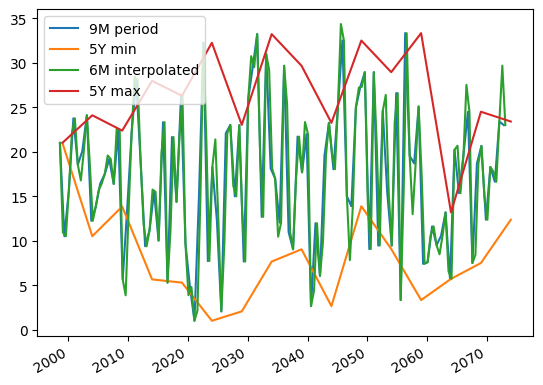

In [27]:
temp_series.plot(label="9M period")
temp_series_2.plot(label="5Y min")
temp_series_3a.plot(label="6M interpolated")
temp_series_4.plot(label="5Y max")

plt.legend()
plt.show()

Time zones

In [28]:
time_series_la = temp_series.tz_localize("America/Los_Angeles")
time_series_la

1998-07-31 19:20:00-07:00    21.002621
1999-04-30 19:20:00-07:00    10.518135
2000-01-31 19:20:00-08:00    15.702349
2000-10-31 19:20:00-08:00    23.753141
2001-07-31 19:20:00-07:00    18.553532
                               ...    
2069-10-31 19:20:00-08:00    12.370217
2070-07-31 19:20:00-08:00    18.295451
2071-04-30 19:20:00-08:00    16.636142
2072-01-31 19:20:00-08:00    23.399368
2072-10-31 19:20:00-08:00    22.994610
Length: 100, dtype: float64

In [31]:
time_series_waw = time_series_la.tz_convert("Europe/Warsaw")
time_series_waw

1998-08-01 04:20:00+02:00    21.002621
1999-05-01 04:20:00+02:00    10.518135
2000-02-01 04:20:00+01:00    15.702349
2000-11-01 04:20:00+01:00    23.753141
2001-08-01 04:20:00+02:00    18.553532
                               ...    
2069-11-01 04:20:00+01:00    12.370217
2070-08-01 04:20:00+01:00    18.295451
2071-05-01 04:20:00+01:00    16.636142
2072-02-01 04:20:00+01:00    23.399368
2072-11-01 04:20:00+01:00    22.994610
Length: 100, dtype: float64

## Periods

`pd.period_range()` returns `PeriodIndex` object

In [33]:
quarters = pd.period_range('2023Q1', periods=10, freq='Q')
quarters

PeriodIndex(['2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2',
             '2024Q3', '2024Q4', '2025Q1', '2025Q2'],
            dtype='period[Q-DEC]')

In [34]:
quarters + 5 # adds 5 quarters to every instance

PeriodIndex(['2024Q2', '2024Q3', '2024Q4', '2025Q1', '2025Q2', '2025Q3',
             '2025Q4', '2026Q1', '2026Q2', '2026Q3'],
            dtype='period[Q-DEC]')

In [36]:
quarters.asfreq("M") # converts to month. Last month of the period is shown by default.

PeriodIndex(['2023-03', '2023-06', '2023-09', '2023-12', '2024-03', '2024-06',
             '2024-09', '2024-12', '2025-03', '2025-06'],
            dtype='period[M]')

In [37]:
quarters.asfreq("M", how="START")

PeriodIndex(['2023-01', '2023-04', '2023-07', '2023-10', '2024-01', '2024-04',
             '2024-07', '2024-10', '2025-01', '2025-04'],
            dtype='period[M]')

In [39]:
quarters.asfreq("A") # Annum - year

PeriodIndex(['2023', '2023', '2023', '2023', '2024', '2024', '2024', '2024',
             '2025', '2025'],
            dtype='period[A-DEC]')

In [41]:
quarterly_revenue = pd.Series([210, 340, 520, 300, 490, 420, 380, 270, 330, 500], index=quarters) 
# the length of values and index needs to align
quarterly_revenue

2023Q1    210
2023Q2    340
2023Q3    520
2023Q4    300
2024Q1    490
2024Q2    420
2024Q3    380
2024Q4    270
2025Q1    330
2025Q2    500
Freq: Q-DEC, dtype: int64

<Axes: >

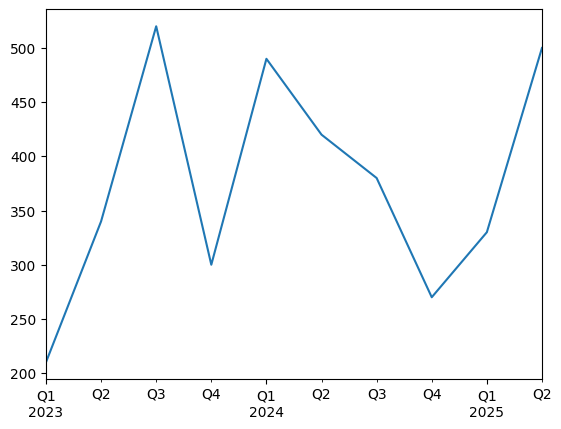

In [42]:
quarterly_revenue.plot()

In [44]:
last_hours = quarterly_revenue.to_timestamp(how="end", freq="H")
last_hours

2023-03-31 23:59:59.999999999    210
2023-06-30 23:59:59.999999999    340
2023-09-30 23:59:59.999999999    520
2023-12-31 23:59:59.999999999    300
2024-03-31 23:59:59.999999999    490
2024-06-30 23:59:59.999999999    420
2024-09-30 23:59:59.999999999    380
2024-12-31 23:59:59.999999999    270
2025-03-31 23:59:59.999999999    330
2025-06-30 23:59:59.999999999    500
dtype: int64

In [46]:
last_hours.to_period()

2023Q1    210
2023Q2    340
2023Q3    520
2023Q4    300
2024Q1    490
2024Q2    420
2024Q3    380
2024Q4    270
2025Q1    330
2025Q2    500
Freq: Q-DEC, dtype: int64

In [48]:
months_2023 = pd.period_range("2023", periods=12, freq="M")
one_day_after_last = months_2023.asfreq("D") + 1
last_business_days = one_day_after_last.to_timestamp() - pd.tseries.offsets.BDay()
last_business_days.to_period("H") + 9 # Last business days in every month of 2023.

PeriodIndex(['2023-01-31 09:00', '2023-02-28 09:00', '2023-03-31 09:00',
             '2023-04-28 09:00', '2023-05-31 09:00', '2023-06-30 09:00',
             '2023-07-31 09:00', '2023-08-31 09:00', '2023-09-29 09:00',
             '2023-10-31 09:00', '2023-11-30 09:00', '2023-12-29 09:00'],
            dtype='period[H]')

## `DataFrame` objects

In [49]:
customers = pd.DataFrame({
    "weight": pd.Series([54, 85, 93, 69], index=["Anne", "Tom", "Billy", "Susan"], name="Weight"),
    "year_birth": pd.Series([1990, 1995, 1997, 2005], index=["Tom", "Billy", "Susan", "Anne"], name="Year"),
    "children": pd.Series([0, 2, 1], index=["Tom", "Anne", "Billy"]),
    "hobby": pd.Series(["Riding", "Dancing", "Singing"], index=["Billy", "Susan", "Anne"], name="Hobby")
})
customers

,weight,year_birth,children,hobby
Anne,54,2005,2.0,Singing
Billy,93,1995,1.0,Riding
Susan,69,1997,NaN,Dancing
Tom,85,1990,0.0,NaN


In [50]:
customers["weight"] # pd.Series

Anne     54
Billy    93
Susan    69
Tom      85
Name: weight, dtype: int64

In [51]:
customers[["weight", "children"]]

,weight,children
Anne,54,2.0
Billy,93,1.0
Susan,69,NaN
Tom,85,0.0


In [54]:
df_2 = pd.DataFrame(
    customers,
    columns=["year_birth", "children", "hobby", "city"],
    index=["Billy", "Tom", "Susan"]
)
df_2 # new DataFrame created from part of the customers dataframe

,year_birth,children,hobby,city
Billy,1995,1.0,Riding,NaN
Tom,1990,0.0,NaN,NaN
Susan,1997,NaN,Dancing,NaN


In [55]:
values = [
    [67, np.nan, "Swimming", 1990],
    [94, 3, "Dancing", 2000],
    [56, 0, "Basketball", 1998]
]

df_3 = pd.DataFrame(
    values,
    columns=["Weight", "Children", "Hobby", "Year of Birth"],
    index=["Alex", "Robert", "Victoria"]
)

df_3

,Weight,Children,Hobby,Year of Birth
Alex,67,NaN,Swimming,1990
Robert,94,3.0,Dancing,2000
Victoria,56,0.0,Basketball,1998


In [57]:
masked_array = np.ma.asarray(values, dtype=object)
masked_array[(0, 2), (1, 2)] = np.ma.masked

df_4 = pd.DataFrame(
    masked_array,
    columns=["year_birth", "children", "hobby", "weight"],
    index=["Billy", "Susan", "Tom"]
)

df_4

,year_birth,children,hobby,weight
Billy,67,NaN,Swimming,1990
Susan,94,3,Dancing,2000
Tom,56,0,NaN,1998


## MultiIndexing

In [59]:
df_5 = pd.DataFrame(
    {
        ("public", "year_birth"):
            {("London", "Alice"):1994, ("Paris", "Bob"):2003, ("Warsaw", "George"):2001},
        ("public", "hobby"):
            {("London", "Alice"):"Bicycles", ("Paris", "Bob"):"Swimming", ("Warsaw", "George"):"Football"},
        ("private", "weight"):
            {("London", "Alice"):64, ("Paris", "Bob"):79, ("Warsaw", "George"):92},
        ("private", "children"):
            {("London", "Alice"):np.nan, ("Paris", "Bob"):3, ("Warsaw", "George"):1},
    }
)

df_5

public           private         
              year_birth     hobby  weight children
London Alice        1994  Bicycles      64      NaN
Paris  Bob          2003  Swimming      79      3.0
Warsaw George       2001  Football      92      1.0

In [60]:
df_5["private"]

,,weight,children
London,Alice,64,NaN
Paris,Bob,79,3.0
Warsaw,George,92,1.0


In [61]:
df_5["public", "hobby"]

London  Alice     Bicycles
Paris   Bob       Swimming
Warsaw  George    Football
Name: (public, hobby), dtype: object

## Deleting level

In [62]:
df_5

public           private         
              year_birth     hobby  weight children
London Alice        1994  Bicycles      64      NaN
Paris  Bob          2003  Swimming      79      3.0
Warsaw George       2001  Football      92      1.0

In [68]:
df_5.columns = df_5.columns.droplevel(level=0)
df_5

,,year_birth,hobby,weight,children
London,Alice,1994,Bicycles,64,NaN
Paris,Bob,2003,Swimming,79,3.0
Warsaw,George,2001,Football,92,1.0
